In [1]:
from poppy.creatures import Poppy4dofArmMini

Pour un robot simulé :

In [2]:
mini_dof = Poppy4dofArmMini(simulator='vrep')

VrepConnectionError: Could not connect to V-REP server on 127.0.0.1:19997. This could also means that you still have a previously opened connection running! (try pypot.vrep.close_all_connections())

Pour un robot réel :

In [189]:
mini_dof = Poppy4dofArmMini()

In [190]:
for m in mini_dof.motors:
    m.compliant = False
    m.goto_position(0,1)
    

In [191]:
import time

In [192]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [125]:
from pypot.primitive import Primitive

In [126]:
class graph_primitive(Primitive):
    def __init__(self,robot,motors_name):
        self.robot = robot
        Primitive.__init__(self, robot)
        self.fake_motors={}
        for name in motors_name:
            self.fake_motors[name] = getattr(self.robot, name)  
        self.position={}
        self.load={}
        self.speed={}
        self.goal_speed={}
        self.moving_speed={}
        
    def setup(self):
        for m in self.fake_motors.keys():
            self.position[m] = []
            self.speed[m] = []
            self.load[m] = []
            self.goal_speed[m] = []
            self.moving_speed[m]= []
        self.python_time=[]
        self.pypot_time=[]
    
    def run(self):
        t0 = time.time()
        while not self.should_stop():
            for m in self.fake_motors.keys():
                self.position[m].append(self.fake_motors[m].present_position)
                self.load[m].append(self.fake_motors[m].present_load)
                self.speed[m].append(self.fake_motors[m].present_speed)
                self.goal_speed[m].append(self.fake_motors[m].goal_speed)
                self.moving_speed[m].append(self.fake_motors[m].moving_speed)
                
            self.python_time.append(time.time()-t0)
            self.pypot_time.append(self.elapsed_time)
            time.sleep(0.02)
            
            

## Tracking a loaded motor : m2

###Fast movement :

In [164]:
graph = graph_primitive(mini_dof,['m1','m2'])

In [171]:
graph.start()
mini_dof.m2.goto_position(90,1,wait=True)
graph.stop()



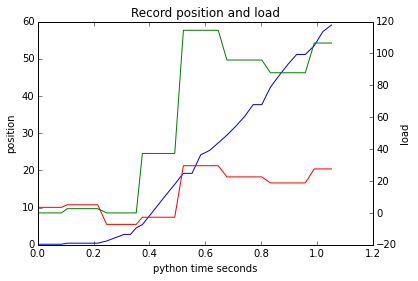

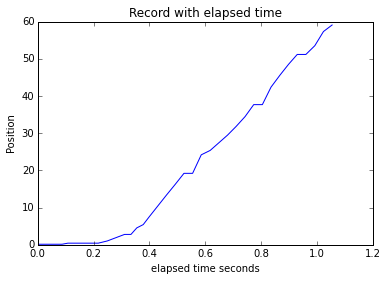

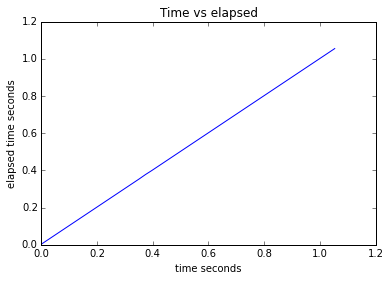

In [172]:
figure(1)            
plot(graph.python_time,graph.position['m2'],"b-")
xlabel('python time seconds')
ylabel('position')
twinx()
plot(graph.python_time,graph.load['m2'],"r-")
ylabel('load')
plot(graph.python_time,graph.speed['m2'],"g-")
title ('Record position and load')
figure(2)
plot(graph.pypot_time,graph.position['m2'])
xlabel('elapsed time seconds')
ylabel('Position')
title ('Record with elapsed time')

figure(3)
plot(graph.python_time,graph.pypot_time)
xlabel('time seconds')
ylabel('elapsed time seconds')
title ('Time vs elapsed')


In [173]:
for m in mini_dof.motors:
    m.goto_position(0,1)

###Slow movement :

In [174]:
graph.start()
mini_dof.m2.goto_position(90,5,wait=True)
graph.stop()

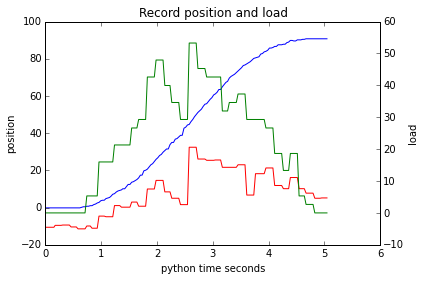

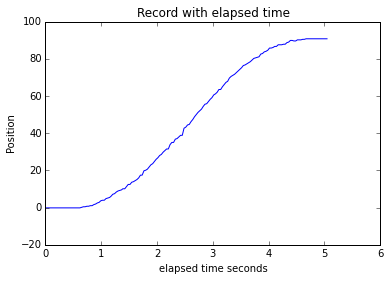

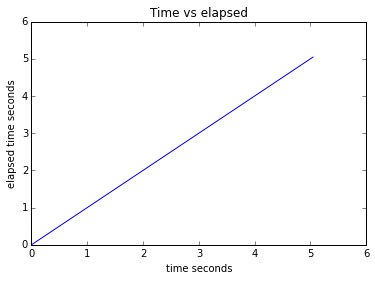

In [175]:
figure(1)            
plot(graph.python_time,graph.position['m2'],"b-")
xlabel('python time seconds')
ylabel('position')
twinx()
plot(graph.python_time,graph.load['m2'],"r-")
ylabel('load')
plot(graph.python_time,graph.speed['m2'],"g-")
title ('Record position and load')
figure(2)
plot(graph.pypot_time,graph.position['m2'])
xlabel('elapsed time seconds')
ylabel('Position')
title ('Record with elapsed time')

figure(3)
plot(graph.python_time,graph.pypot_time)
xlabel('time seconds')
ylabel('elapsed time seconds')
title ('Time vs elapsed')


In [176]:
for m in mini_dof.motors:
    m.goto_position(0,1)

## Tracking an unloaded motor : m4

###Fast movement :

In [17]:
graph = graph_primitive(mini_dof,['m4',])

In [18]:
graph.start()
mini_dof.m4.goto_position(90,1,wait=True)
graph.stop()



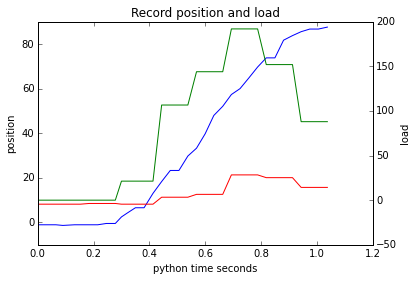

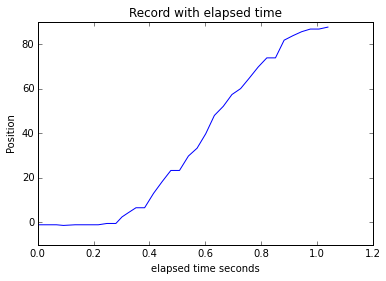

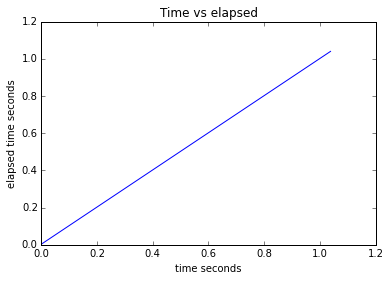

In [19]:
figure(1)            
plot(graph.python_time,graph.position['m4'],"b-")
xlabel('python time seconds')
ylabel('position')
twinx()
plot(graph.python_time,graph.load['m4'],"r-")
ylabel('load')
plot(graph.python_time,graph.speed['m4'],"g-")
title ('Record position and load')
figure(2)
plot(graph.pypot_time,graph.position['m4'])
xlabel('elapsed time seconds')
ylabel('Position')
title ('Record with elapsed time')

figure(3)
plot(graph.python_time,graph.pypot_time)
xlabel('time seconds')
ylabel('elapsed time seconds')
title ('Time vs elapsed')


In [20]:
for m in mini_dof.motors:
    m.goto_position(0,1)

###Slow movement :

In [21]:
graph.start()
mini_dof.m4.goto_position(90,5,wait=True)
graph.stop()

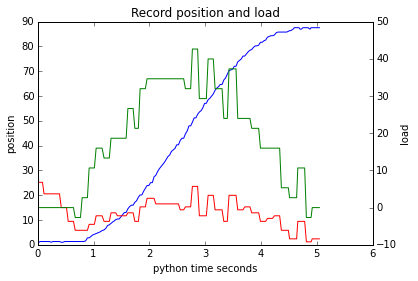

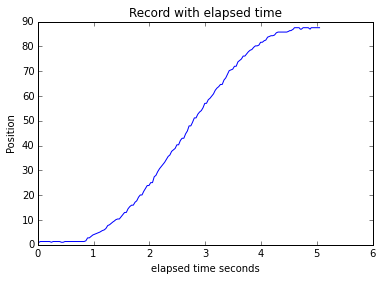

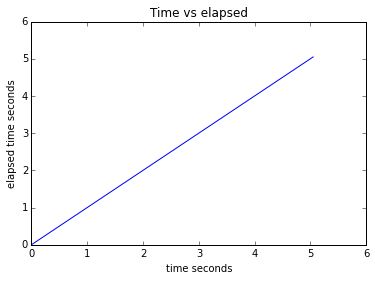

In [22]:
figure(1)            
plot(graph.python_time,graph.position['m4'],"b-")
xlabel('python time seconds')
ylabel('position')
twinx()
plot(graph.python_time,graph.load['m4'],"r-")
ylabel('load')
plot(graph.python_time,graph.speed['m4'],"g-")
title ('Record position and load')
figure(2)
plot(graph.pypot_time,graph.position['m4'])
xlabel('elapsed time seconds')
ylabel('Position')
title ('Record with elapsed time')

figure(3)
plot(graph.python_time,graph.pypot_time)
xlabel('time seconds')
ylabel('elapsed time seconds')
title ('Time vs elapsed')


In [50]:
for m in mini_dof.motors:
    m.goto_position(0,1)

##Time dependant movement :

In [129]:
graph = graph_primitive(mini_dof,['m2',])

In [37]:
graph.start()
mini_dof.m2.goto_position(90,1,wait=True)
mini_dof.m2.goto_position(-90,1,wait=True)
mini_dof.m2.goto_position(90,1,wait=True)
mini_dof.m2.goto_position(-90,1,wait=True)
mini_dof.m2.goto_position(0,1,wait=True)
graph.stop()

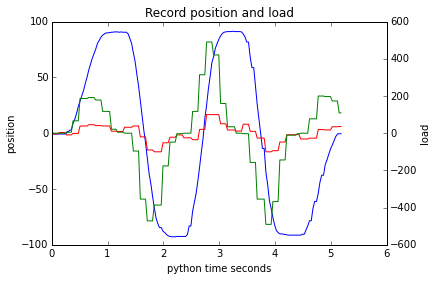

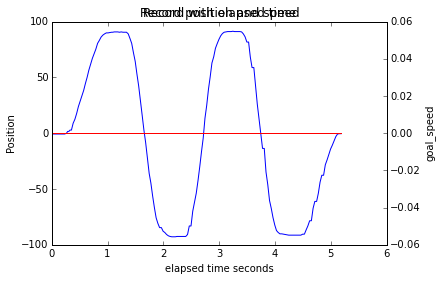

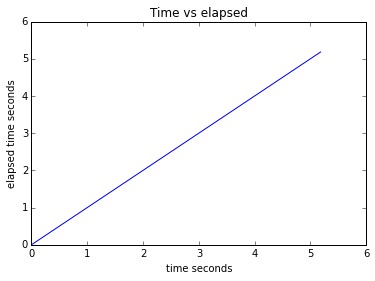

In [38]:
figure(1)            
plot(graph.python_time,graph.position['m2'],"b-")
xlabel('python time seconds')
ylabel('position')
twinx()
plot(graph.python_time,graph.load['m2'],"r-")
ylabel('load')
plot(graph.python_time,graph.speed['m2'],"g-")
title ('Record position and load')
figure(2)
plot(graph.pypot_time,graph.position['m2'])
xlabel('elapsed time seconds')
ylabel('Position')
title ('Record with elapsed time position and speed')
twinx()
plot(graph.pypot_time,graph.goal_speed['m2'],"r-")
ylabel('goal_speed')
plot(graph.pypot_time,graph.moving_speed['m2'],"r-")


figure(3)
plot(graph.python_time,graph.pypot_time)
xlabel('time seconds')
ylabel('elapsed time seconds')
title ('Time vs elapsed')


In [130]:
for m in mini_dof.motors:
    m.goto_behavior='dummy'

In [159]:
graph.start()
mini_dof.m2.goto_position(90,1,wait=True)
mini_dof.m2.goto_position(-90,1,wait=True)
mini_dof.m2.goto_position(90,1,wait=True)
mini_dof.m2.goto_position(-90,1,wait=True)
mini_dof.m2.goto_position(0,1,wait=True)
graph.stop()

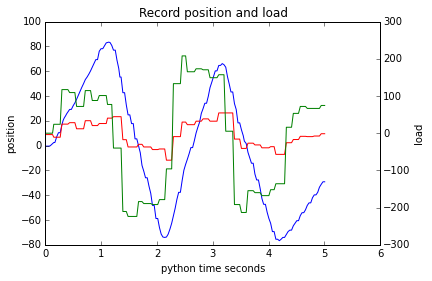

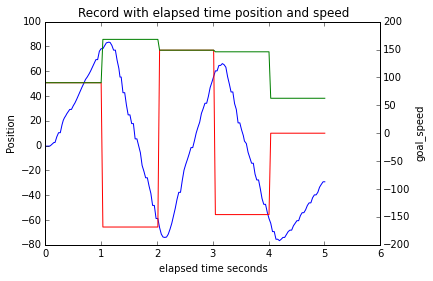

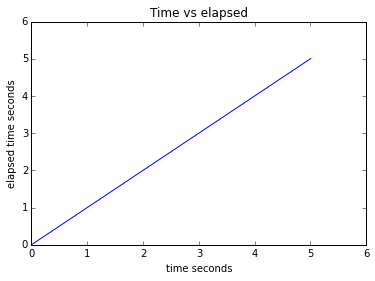

In [132]:
figure(1)            
plot(graph.python_time,graph.position['m2'],"b-")
xlabel('python time seconds')
ylabel('position')
twinx()
plot(graph.python_time,graph.load['m2'],"r-")
ylabel('load')
plot(graph.python_time,graph.speed['m2'],"g-")
title ('Record position and load')
figure(2)
plot(graph.pypot_time,graph.position['m2'])
xlabel('elapsed time seconds')
ylabel('Position')
title ('Record with elapsed time position and speed')
twinx()
plot(graph.pypot_time,graph.goal_speed['m2'],"r-")
ylabel('goal_speed')
plot(graph.pypot_time,graph.moving_speed['m2'],"g-")


figure(3)
plot(graph.python_time,graph.pypot_time)
xlabel('time seconds')
ylabel('elapsed time seconds')
title ('Time vs elapsed')


In [158]:
graph.start()
mini_dof.m2.goal_speed=90
time.sleep(1)
mini_dof.m2.goal_speed=-180
time.sleep(1)
mini_dof.m2.goal_speed=180
time.sleep(1)
mini_dof.m2.goal_speed=-90
time.sleep(1)
mini_dof.m2.goal_speed=0
time.sleep(1)
graph.stop()

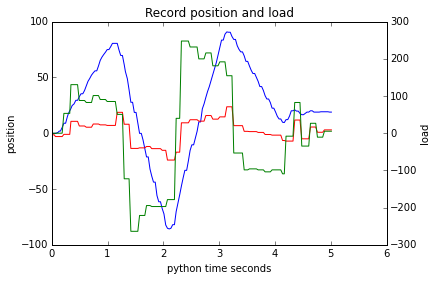

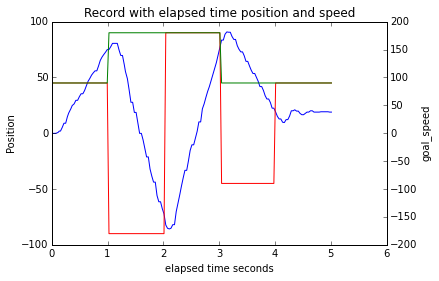

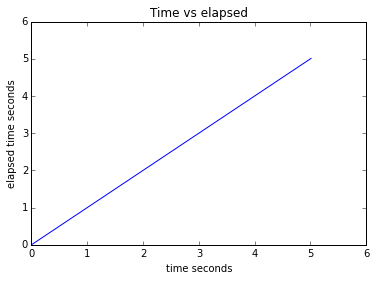

In [72]:
figure(1)            
plot(graph.python_time,graph.position['m2'],"b-")
xlabel('python time seconds')
ylabel('position')
twinx()
plot(graph.python_time,graph.load['m2'],"r-")
ylabel('load')
plot(graph.python_time,graph.speed['m2'],"g-")
title ('Record position and load')
figure(2)
plot(graph.pypot_time,graph.position['m2'])
xlabel('elapsed time seconds')
ylabel('Position')
title ('Record with elapsed time position and speed')
twinx()
plot(graph.pypot_time,graph.goal_speed['m2'],"r-")
ylabel('goal_speed')
plot(graph.pypot_time,graph.moving_speed['m2'],"g-")


figure(3)
plot(graph.python_time,graph.pypot_time)
xlabel('time seconds')
ylabel('elapsed time seconds')
title ('Time vs elapsed')


In [170]:
for m in mini_dof.motors:
    m.goto_position(0,1)

En minjerk, le controle est purement basé sur la position.

En dummy, le controle est basé sur la vitesse. Une vitesse est définie afin d'atteindre la position en un temps donné. Cependant la position n'est pas atteinte car le contrôle en vitesse n'est pas fiable sur les positions ! Les tests de vitesse montre bien que la position n'est pas atteinte.

In [177]:
mini_dof.m2.pid=(3,0.4,0.1)

In [187]:
mini_dof.m3.goal_position=90

In [115]:
mini_dof.m2.goal_speed=0

In [180]:
mini_dof.m2.moving_speed=200

In [140]:
mini_dof.m2.goal_position

0.0

In [141]:
mini_dof.m2.goal_speed

0.0

In [142]:
mini_dof.m2.moving_speed

0

In [204]:
for m in mini_dof.motors:
    m.goto_behavior='dummy'

In [214]:
for m in mini_dof.motors:
    m.goto_position(0,0.5)

In [212]:
for m in mini_dof.motors:
    m.pid=(3,0.4,0.1)

In [215]:
mini_dof.motors

[<DxlMotor name=m1 id=1 pos=-0.15>,
 <DxlMotor name=m2 id=2 pos=-0.44>,
 <DxlMotor name=m3 id=3 pos=0.44>,
 <DxlMotor name=m4 id=4 pos=1.61>]

In [216]:
mini_dof.close()